# **ANÁLISE DE VENDAS**

## **Leitura e Visualização Inicial**

In [1]:
!pip install ydata-profiling

: 

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
!pip install --upgrade Pillow

In [2]:
import pandas as pd
import yaml

# Carregar os dados dos funcionários a partir do arquivo YAML
with open('empresa.yaml', 'r') as file:
    dados = yaml.safe_load(file)

In [3]:
# Tabela de Vendas
df_vendas = pd.DataFrame(dados['vendas'])
print(df_vendas.describe())
print(df_vendas.head())

              id  quantidade  preco_unitario  cliente_id
count  60.000000   60.000000       60.000000   60.000000
mean   30.500000    1.833333     3500.000000  107.800000
std    17.464249    0.806051     1089.238577    4.111992
min     1.000000    1.000000     2500.000000  101.000000
25%    15.750000    1.000000     2500.000000  104.000000
50%    30.500000    2.000000     3000.000000  108.000000
75%    45.250000    2.250000     5000.000000  112.000000
max    60.000000    3.000000     5000.000000  113.000000
   id        data   produto  quantidade  preco_unitario  cliente_id
0   1  2023-01-05  Banheira           2          2500.0         101
1   2  2023-02-12    OfurÃ´           1          3000.0         113
2   3  2023-03-20       Spa           3          5000.0         103
3   4  2023-04-10  Banheira           1          2500.0         104
4   5  2023-05-15    OfurÃ´           2          3000.0         105


In [4]:
# Tabela de Clientes
df_cliente = pd.DataFrame(dados['comportamento_do_cliente'])
print(df_cliente.describe())
print(df_cliente.head())

              id      idade
count   13.00000  12.000000
mean   107.00000  46.333333
std      3.89444   7.126561
min    101.00000  36.000000
25%    104.00000  41.500000
50%    107.00000  46.000000
75%    110.00000  50.500000
max    113.00000  60.000000
    id            nome  idade       sexo          cidade valor_gasto_total
0  101  JoÃ£o da Silva   45.0  Masculino      SÃ£o Paulo              None
1  102  Maria Oliveira   38.0   Feminino  Rio de Janeiro              None
2  103    Carlos Souza   50.0  Masculino  Belo Horizonte              None
3  104      Ana Santos   55.0   Feminino    Porto Alegre              None
4  105     Pedro Costa   42.0  Masculino       BrasÃ­lia              None


In [5]:
# Tabela de Produtos
df_produto = pd.DataFrame(dados['desempenho_do_produto'])
print(df_produto.describe())
print(df_cliente.head())

         produto vendas_totais receita_total
count          3             0             0
unique         3             0             0
top     Banheira           NaN           NaN
freq           1           NaN           NaN
    id            nome  idade       sexo          cidade valor_gasto_total
0  101  JoÃ£o da Silva   45.0  Masculino      SÃ£o Paulo              None
1  102  Maria Oliveira   38.0   Feminino  Rio de Janeiro              None
2  103    Carlos Souza   50.0  Masculino  Belo Horizonte              None
3  104      Ana Santos   55.0   Feminino    Porto Alegre              None
4  105     Pedro Costa   42.0  Masculino       BrasÃ­lia              None


In [9]:
profile = ProfileReport(df_vendas, title="vendas")

In [10]:
profile.to_file("vendas.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 123.54it/s]


In [6]:
# Plotagem de Gráfico com a quantidade de vendas por mês
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')
import seaborn as sns
import locale

locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')

# Convertendo a coluna data para datetime
df_vendas['data'] = pd.to_datetime(df_vendas['data'])
# Contando os dias de venda
dias = df_vendas['data'].value_counts()
# Somando a quantidade de vendas por dia
vendas_mes = df_vendas.groupby('data')['quantidade'].sum().reset_index(name='quantidade')
# Definindo os meses de acordo com as datas
vendas_mes['mes'] = vendas_mes['data'].dt.strftime('%B')
print(dias)
print(vendas_mes)

# Plotando os gráficos de vendas por mês
plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_mes, x='mes', y='quantidade', color= 'xkcd:coral')
plt.title('Quantidade de vendas por Mês')
plt.xlabel('Meses')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

data
2023-01-05    5
2023-02-12    5
2023-03-20    5
2023-04-10    5
2023-05-15    5
2023-06-25    5
2023-07-05    5
2023-08-18    5
2023-09-30    5
2023-10-08    5
2023-11-12    5
2023-12-20    5
Name: count, dtype: int64
         data  quantidade        mes
0  2023-01-05          12    janeiro
1  2023-02-12           9  fevereiro
2  2023-03-20           9     marÃ§o
3  2023-04-10           7      abril
4  2023-05-15          12       maio
5  2023-06-25           8      junho
6  2023-07-05           5      julho
7  2023-08-18          13     agosto
8  2023-09-30           9   setembro
9  2023-10-08           8    outubro
10 2023-11-12           7   novembro
11 2023-12-20          11   dezembro


## **Análise Estatística Inicial**

In [7]:
# Calculando estatísticas de VENDAS
print(df_vendas.head())
print(df_vendas.info())
print(df_vendas.describe())

media_vendas = df_vendas.groupby('produto')['preco_unitario'].mean()
print(media_vendas)

print(df_vendas['quantidade'].min())
print(df_vendas['quantidade'].max())


   id       data   produto  quantidade  preco_unitario  cliente_id
0   1 2023-01-05  Banheira           2          2500.0         101
1   2 2023-02-12    OfurÃ´           1          3000.0         113
2   3 2023-03-20       Spa           3          5000.0         103
3   4 2023-04-10  Banheira           1          2500.0         104
4   5 2023-05-15    OfurÃ´           2          3000.0         105
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              60 non-null     int64         
 1   data            60 non-null     datetime64[ns]
 2   produto         60 non-null     object        
 3   quantidade      60 non-null     int64         
 4   preco_unitario  60 non-null     float64       
 5   cliente_id      60 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 2.9+ KB

In [8]:
# Calculando estatísticas de CLIENTES
print(df_cliente)
print(df_cliente.describe())
print(df_cliente.info())

print(df_cliente['idade'].min())
print(df_cliente['idade'].max())

     id             nome  idade       sexo          cidade valor_gasto_total
0   101   JoÃ£o da Silva   45.0  Masculino      SÃ£o Paulo              None
1   102   Maria Oliveira   38.0   Feminino  Rio de Janeiro              None
2   103     Carlos Souza   50.0  Masculino  Belo Horizonte              None
3   104       Ana Santos   55.0   Feminino    Porto Alegre              None
4   105      Pedro Costa   42.0  Masculino       BrasÃ­lia              None
5   106    Sofia Pereira   48.0   Feminino          Recife              None
6   107     JosÃ© Santos   60.0  Masculino        Salvador              None
7   108       Paula Lima   36.0   Feminino       Fortaleza              None
8   109    Luiz Oliveira   47.0  Masculino          Manaus              None
9   110  Cristina Santos   52.0   Feminino        Curitiba              None
10  111    Antonio Costa   40.0  Masculino           Natal              None
11  112    Beatriz Silva   43.0   Feminino  FlorianÃ³polis              None

In [9]:
# Calculando estatísticas de PRODUTOS
print(df_produto)
print(df_produto.describe())
print(df_produto.info())


    produto vendas_totais receita_total
0  Banheira          None          None
1    OfurÃ´          None          None
2       Spa          None          None
         produto vendas_totais receita_total
count          3             0             0
unique         3             0             0
top     Banheira           NaN           NaN
freq           1           NaN           NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   produto        3 non-null      object
 1   vendas_totais  0 non-null      object
 2   receita_total  0 non-null      object
dtypes: object(3)
memory usage: 204.0+ bytes
None


## **Análise de Produtos**

In [10]:
import numpy as np

print(df_vendas.head())

# Calculando a quantidade de produtos vendidos
mais_vendidos = (
    df_vendas.groupby("produto")["quantidade"].sum().reset_index(name="quantidade")
)

print(mais_vendidos)


# Calculando a receita total de cada produto
df_vendas["preco_total"] = df_vendas["quantidade"] * df_vendas["preco_unitario"]
receita_total = (
    df_vendas.groupby("produto")["preco_total"].sum().reset_index(name="receita_total")
)
print(receita_total)


# Definindo os valores nulos do df_produto
df_produto["receita_total"] = receita_total["receita_total"]

df_produto["vendas_totais"] = mais_vendidos["quantidade"]

print(df_produto)


# Plotando o gráfico de barras de produtos vendidos
plt.figure(figsize=(7, 5))

grafico_produto_vend = sns.barplot(data=mais_vendidos, x="produto", y="quantidade", color="xkcd:coral")
plt.title("Quantidade de Produtos Vendidos")

plt.xlabel("Produto")

plt.ylabel("Quantidade Vendida")

grafico_produto_vend.bar_label(grafico_produto_vend.containers[0])

plt.tight_layout()

plt.show()


# Plotando o gráfico de pizza da receita total dos produtos
colors = sns.color_palette("pastel")

# Definindo a tamanho da explosão
explode = (0.02, 0.02, 0.02)

# Criando função para formatar a legenda interna
def func(pct, allvalues):
    absolute = int(pct / 100.0 * np.sum(allvalues))
    return " {:.1f}%\n(R${:d})".format(pct, absolute)

# Configs do grafico de pizza
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    receita_total["receita_total"],
    autopct=lambda pct: func(pct, receita_total["receita_total"]),
    labels=receita_total["produto"],
    explode = explode,
    colors=colors,
    textprops=dict(color="black"),
)

# Definindo a legenda
ax.legend(
    wedges,
    receita_total["produto"],
    title="Produtos",
    loc="center left",
    bbox_to_anchor=(1, 0, 1, 1),
)

# Font
plt.setp(autotexts, size=7, weight="regular")

# Titulo
ax.set_title("Receita total dos Produtos")

plt.show()


   id       data   produto  quantidade  preco_unitario  cliente_id
0   1 2023-01-05  Banheira           2          2500.0         101
1   2 2023-02-12    OfurÃ´           1          3000.0         113
2   3 2023-03-20       Spa           3          5000.0         103
3   4 2023-04-10  Banheira           1          2500.0         104
4   5 2023-05-15    OfurÃ´           2          3000.0         105
    produto  quantidade
0  Banheira          32
1    OfurÃ´          41
2       Spa          37
    produto  receita_total
0  Banheira        80000.0
1    OfurÃ´       123000.0
2       Spa       185000.0
    produto  vendas_totais  receita_total
0  Banheira             32        80000.0
1    OfurÃ´             41       123000.0
2       Spa             37       185000.0


## **Análise Temporal**

In [1]:
# Análise das quantidade vendidas ao longo do tempo
print(df_vendas)
quant_vendida_mes = df_vendas.groupby('data')['produto'].value_counts().reset_index(name= 'quant')
print(quant_vendida_mes)
quant_vendida_mes['mes'] = quant_vendida_mes['data'].dt.strftime('%B')
sns.set_theme(style="dark")
sns.lineplot(data=quant_vendida_mes, x="mes", y="quant")
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.title('Quantidade de vendas ao longos dos meses de 2023')
plt.show()

NameError: name 'df_vendas' is not defined

In [12]:
# Receita por mês [TOTAL DOS PRODUTOS]
money = df_vendas.groupby('data')['preco_total'].sum().reset_index(name= 'vendas')
print(money)
# Plotando o gráfico de linha de receita x mês
money['mes'] = money['data'].dt.strftime('%B')
sns.set_theme(style="dark")
sns.lineplot(data=money, x="mes", y="vendas")
vendas_mes['mes'] = vendas_mes['data'].dt.strftime('%B')
plt.xlabel('Data')
plt.ylabel('Faturamento')
plt.title('Faturamento ao longo dos meses de 2023')
plt.show()

         data   vendas
0  2023-01-05  30000.0
1  2023-02-12  27000.0
2  2023-03-20  45000.0
3  2023-04-10  17500.0
4  2023-05-15  36000.0
5  2023-06-25  40000.0
6  2023-07-05  12500.0
7  2023-08-18  39000.0
8  2023-09-30  45000.0
9  2023-10-08  20000.0
10 2023-11-12  21000.0
11 2023-12-20  55000.0


c:\Users\DevTarde\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DevTarde\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


## **Análise de Clientes**

In [13]:
import seaborn as sns
# Calculo do gasto total de cada cliente
gasto_cliente = df_vendas.groupby('cliente_id')['preco_total'].sum().reset_index(name='gasto_cliente')
print(gasto_cliente)

df_merged = pd.merge(df_vendas, df_cliente, left_on='cliente_id', right_on='id', how='left')

# DataFrame df_cliente atualizada com os totais gastos por cada cliente
df_cliente['valor_gasto_total'] = gasto_cliente['gasto_cliente']
print(df_cliente)
cliente = df_cliente['nome']
gastos = df_cliente['valor_gasto_total']
cidade = df_cliente['cidade']
sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_cliente,
    x="cidade", y="nome",
    hue="valor_gasto_total", size="valor_gasto_total",
    palette=cmap, sizes=(10, 200),
)
g.despine(left=True, bottom=True)
plt.xticks(rotation=45)
plt.show()

    cliente_id  gasto_cliente
0          101        25000.0
1          102        24000.0
2          103        45000.0
3          104        12500.0
4          105        27000.0
5          106        40000.0
6          107         5000.0
7          108        39000.0
8          109        45000.0
9          110         7500.0
10         111        15000.0
11         112        55000.0
12         113        48000.0
     id             nome  idade       sexo          cidade  valor_gasto_total
0   101   JoÃ£o da Silva   45.0  Masculino      SÃ£o Paulo            25000.0
1   102   Maria Oliveira   38.0   Feminino  Rio de Janeiro            24000.0
2   103     Carlos Souza   50.0  Masculino  Belo Horizonte            45000.0
3   104       Ana Santos   55.0   Feminino    Porto Alegre            12500.0
4   105      Pedro Costa   42.0  Masculino       BrasÃ­lia            27000.0
5   106    Sofia Pereira   48.0   Feminino          Recife            40000.0
6   107     JosÃ© Santos   60.0  M

In [14]:
# Calcular a frequência de compra de cada cliente
frequencia_compra = df_merged.groupby(['cliente_id', 'nome']).size().reset_index(name='frequencia')
print(frequencia_compra)
sns.barplot(data=frequencia_compra, x='nome', y='frequencia')
plt.xlabel('Nome do Cliente')
plt.ylabel('Frequência de Compra')
plt.title('Histograma da Frequência de Compra por Cliente')
plt.xticks(rotation=30)
plt.show()

    cliente_id             nome  frequencia
0          101   JoÃ£o da Silva           4
1          102   Maria Oliveira           4
2          103     Carlos Souza           5
3          104       Ana Santos           3
4          105      Pedro Costa           4
5          106    Sofia Pereira           5
6          107     JosÃ© Santos           2
7          108       Paula Lima           5
8          109    Luiz Oliveira           5
9          110  Cristina Santos           2
10         111    Antonio Costa           4
11         112    Beatriz Silva           5
12         113     Loja Propria          12


## **Análise de Preços** 

In [15]:
preco_medio_produtos = df_vendas.groupby('produto')['preco_unitario'].mean().reset_index(name ='media')
print(preco_medio_produtos)

sns.boxplot(data=preco_medio_produtos, x="produto", y="media")
plt.title("Análise do Preço dos Produtos")
plt.xlabel('Produto')
plt.ylabel('Preço')
plt.show()


    produto   media
0  Banheira  2500.0
1    OfurÃ´  3000.0
2       Spa  5000.0


## **CONCLUSÃO**

In [ ]:
print(df_vendas.head())

print(df_cliente.head())

print(df_produto.head())

In [17]:
pip install iPython

^C
Note: you may need to restart the kernel to use updated packages.


In [18]:
from IPython.display import Image, display

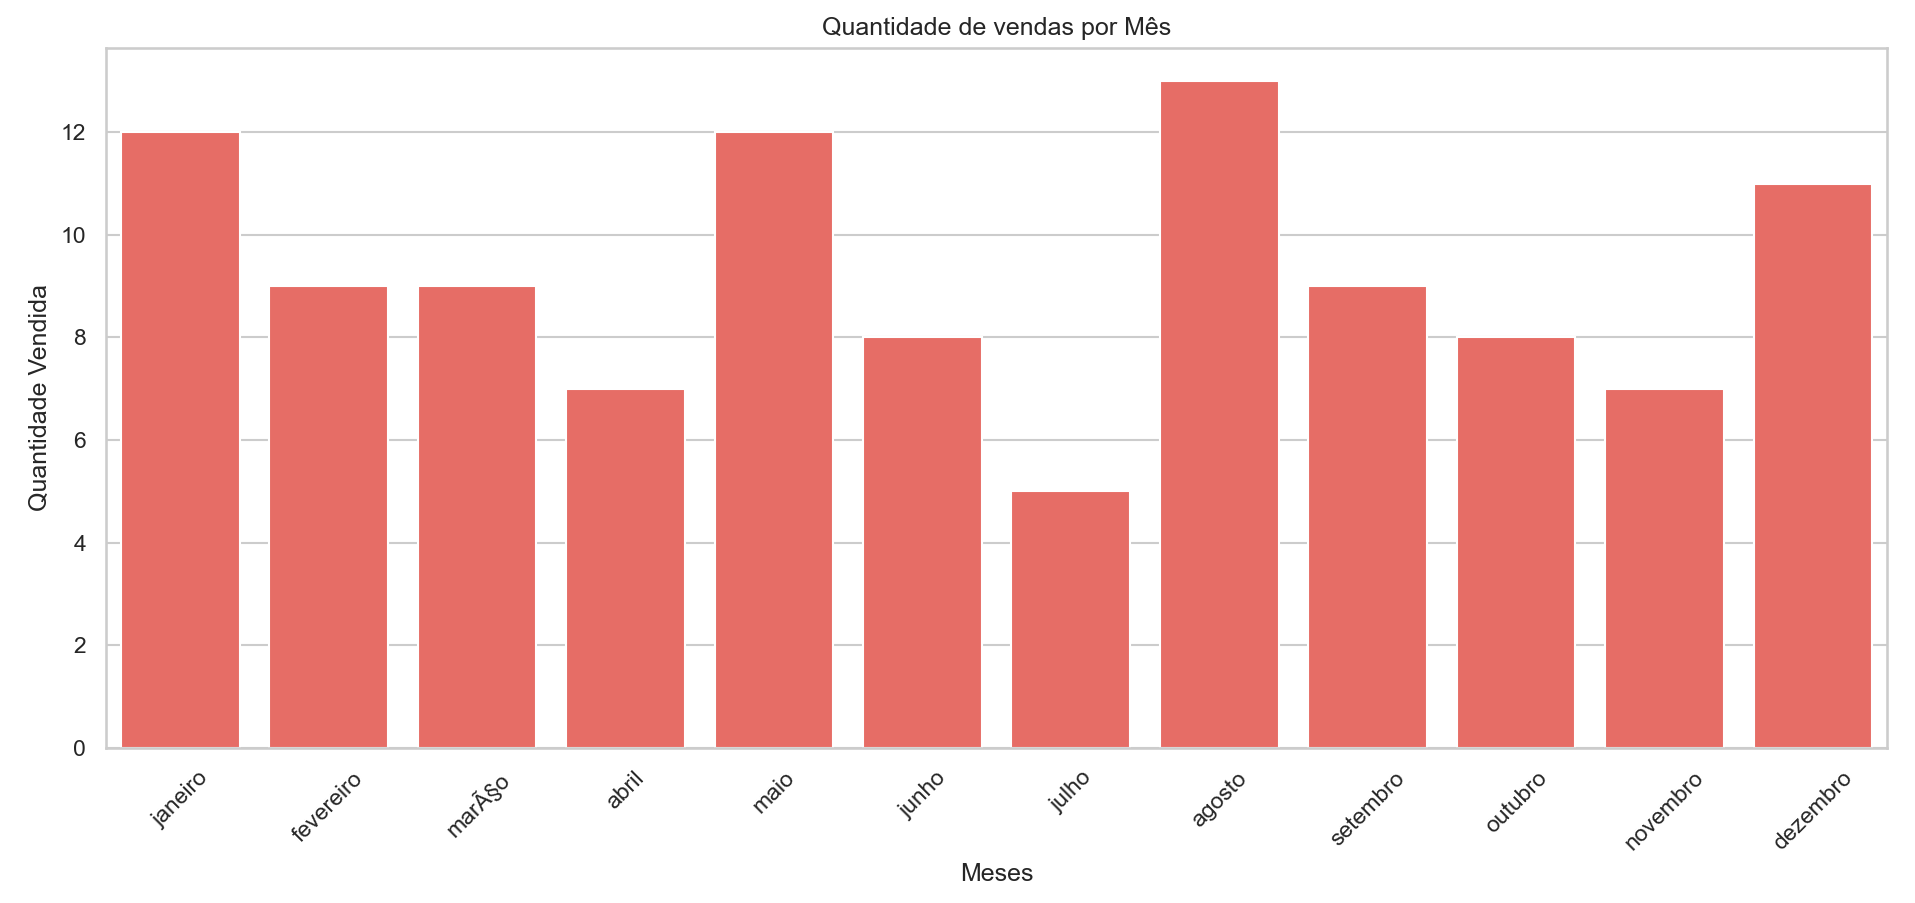

In [19]:
# Análise da quantidade de vendas por mês
display(Image(filename='quantidade_por_mes.png'))

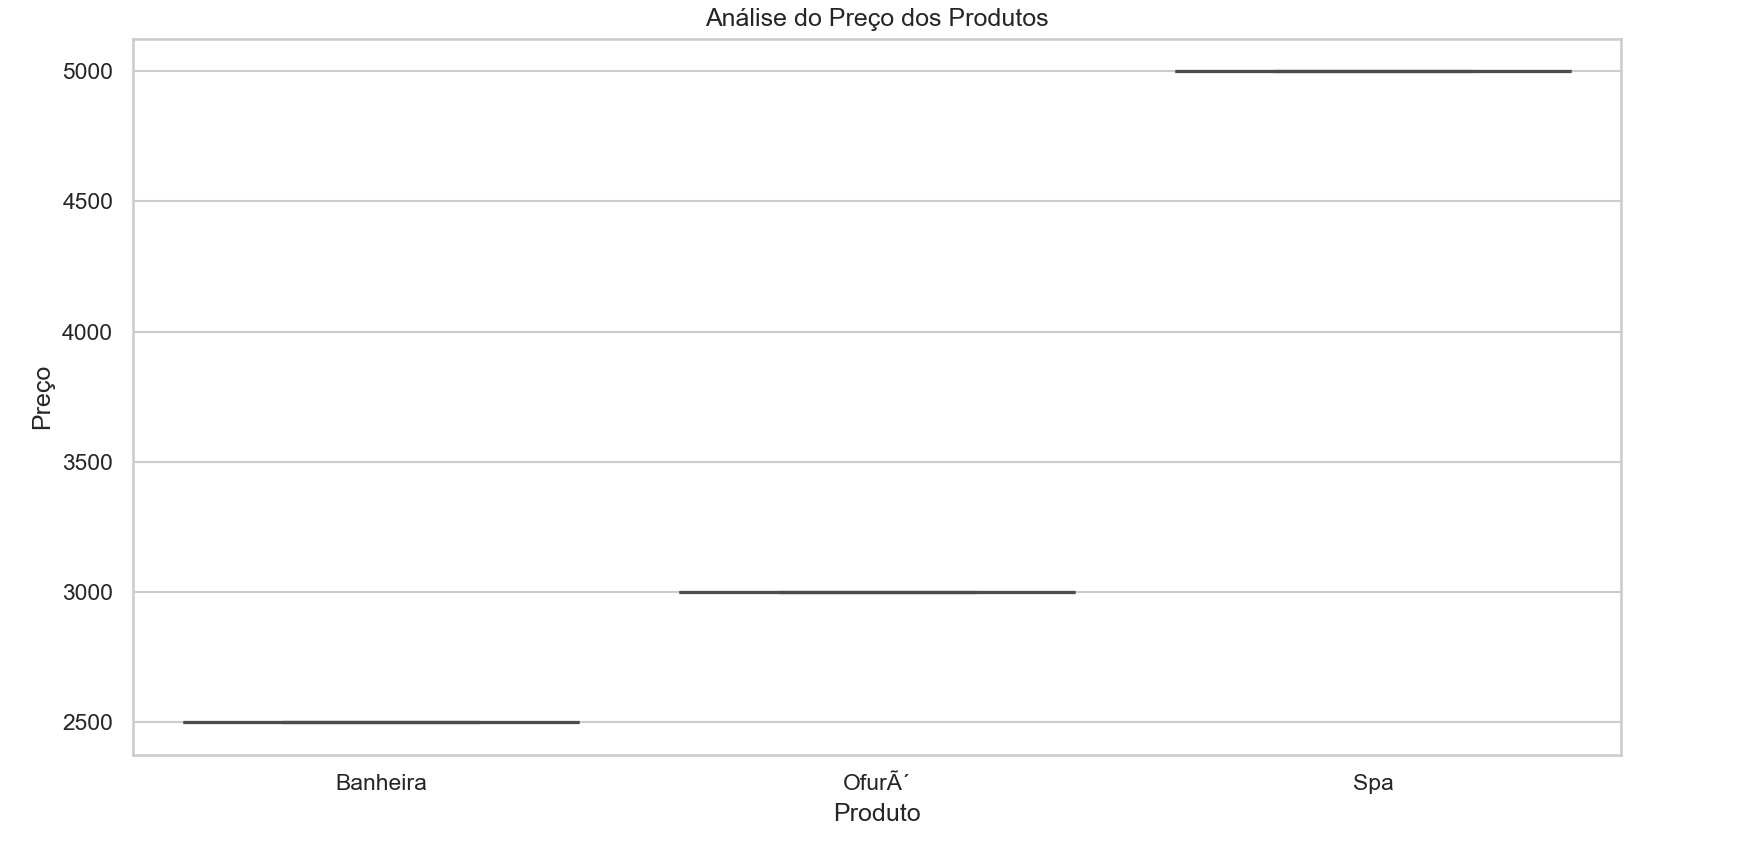

In [20]:
# Análise do preço dos produtos
display(Image(filename='preco_produtos.png'))

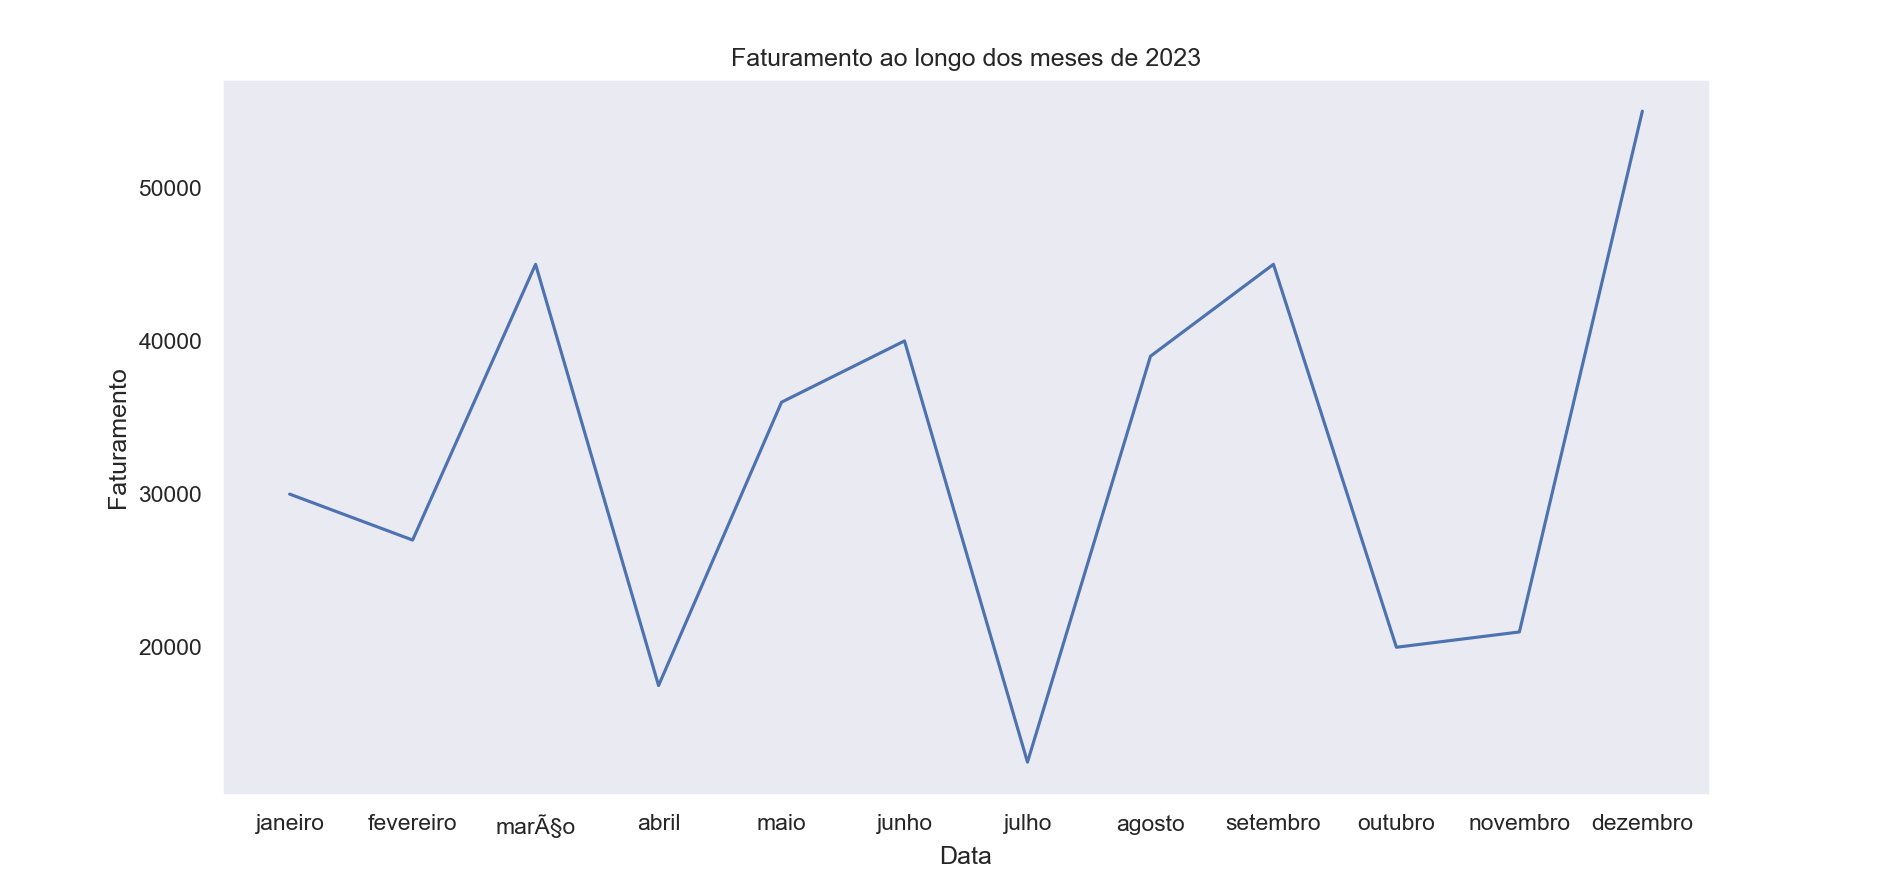

In [21]:
# Análise do faturamento por mês
display(Image(filename='faturamento_por_mes.png'))

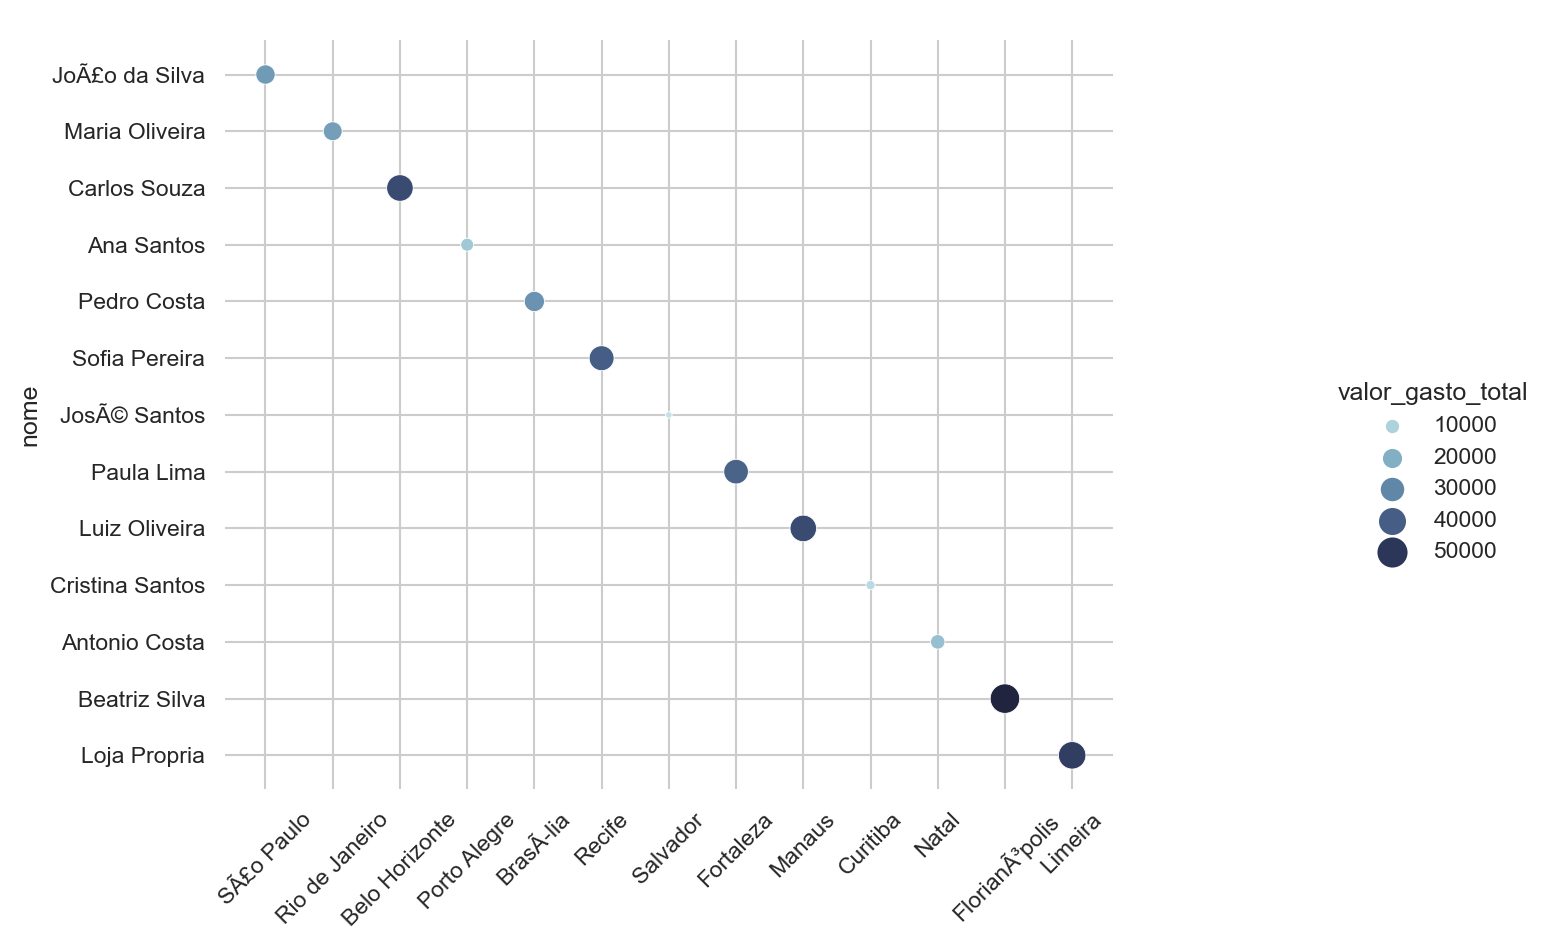

In [22]:
# Análise de cidade e pessoas
display(Image(filename='cidade_pessoa.png'))

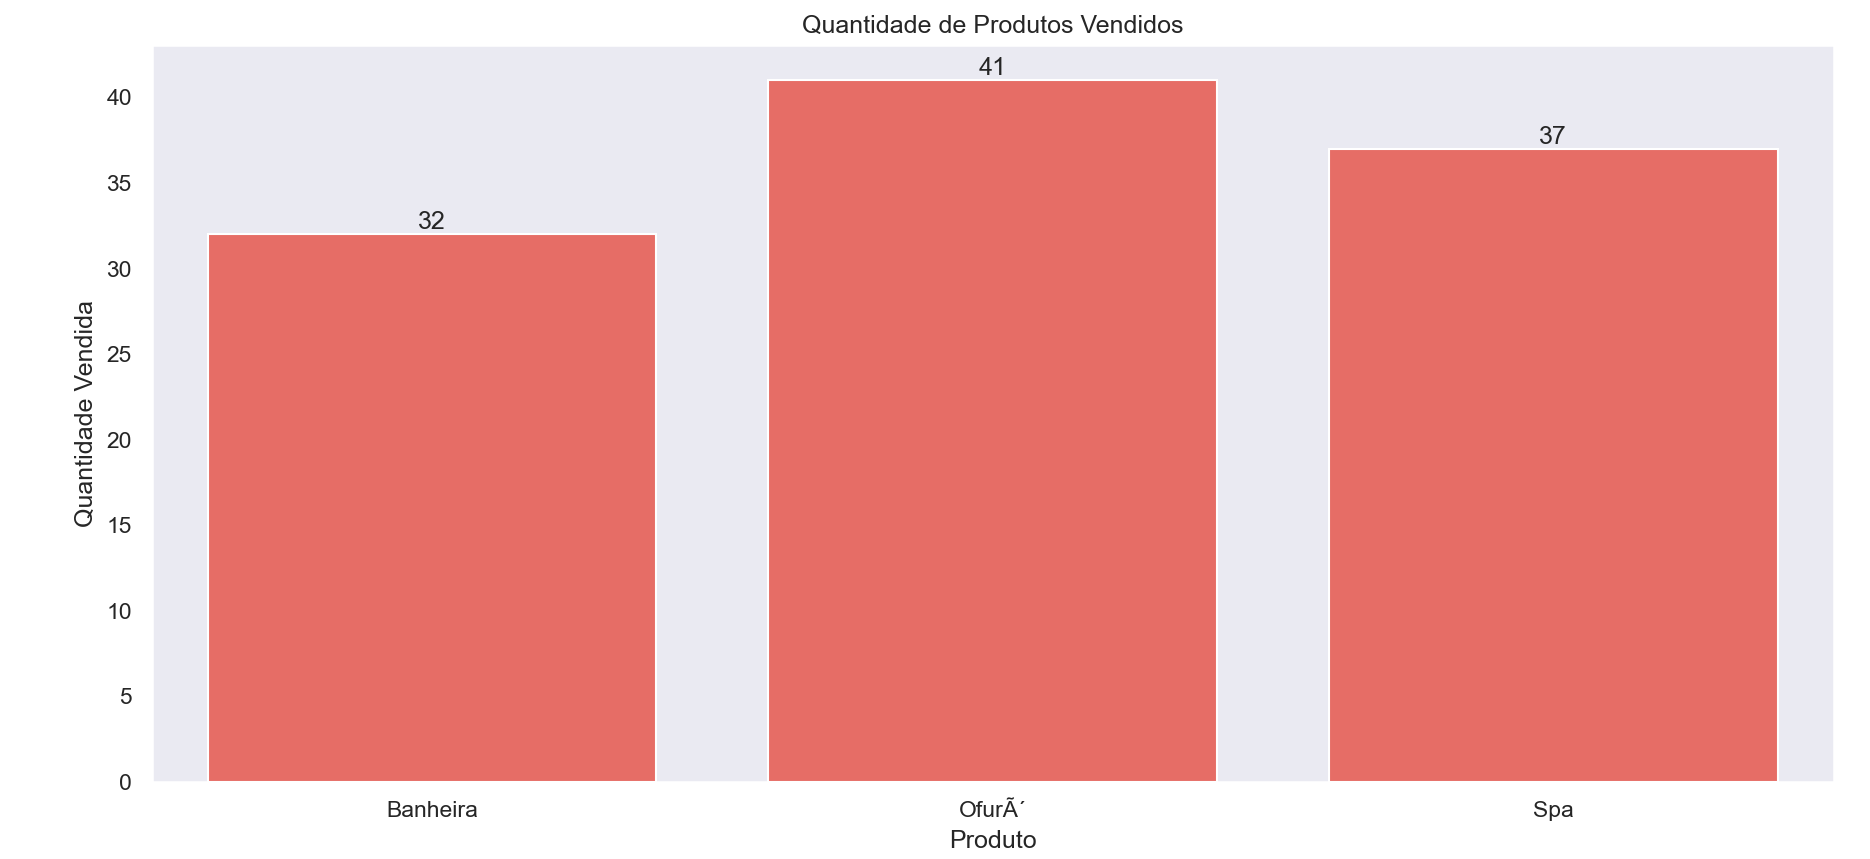

In [23]:
# Análise de quantidades de produtos vendidas
display(Image(filename='quantidade_vendida.png'))

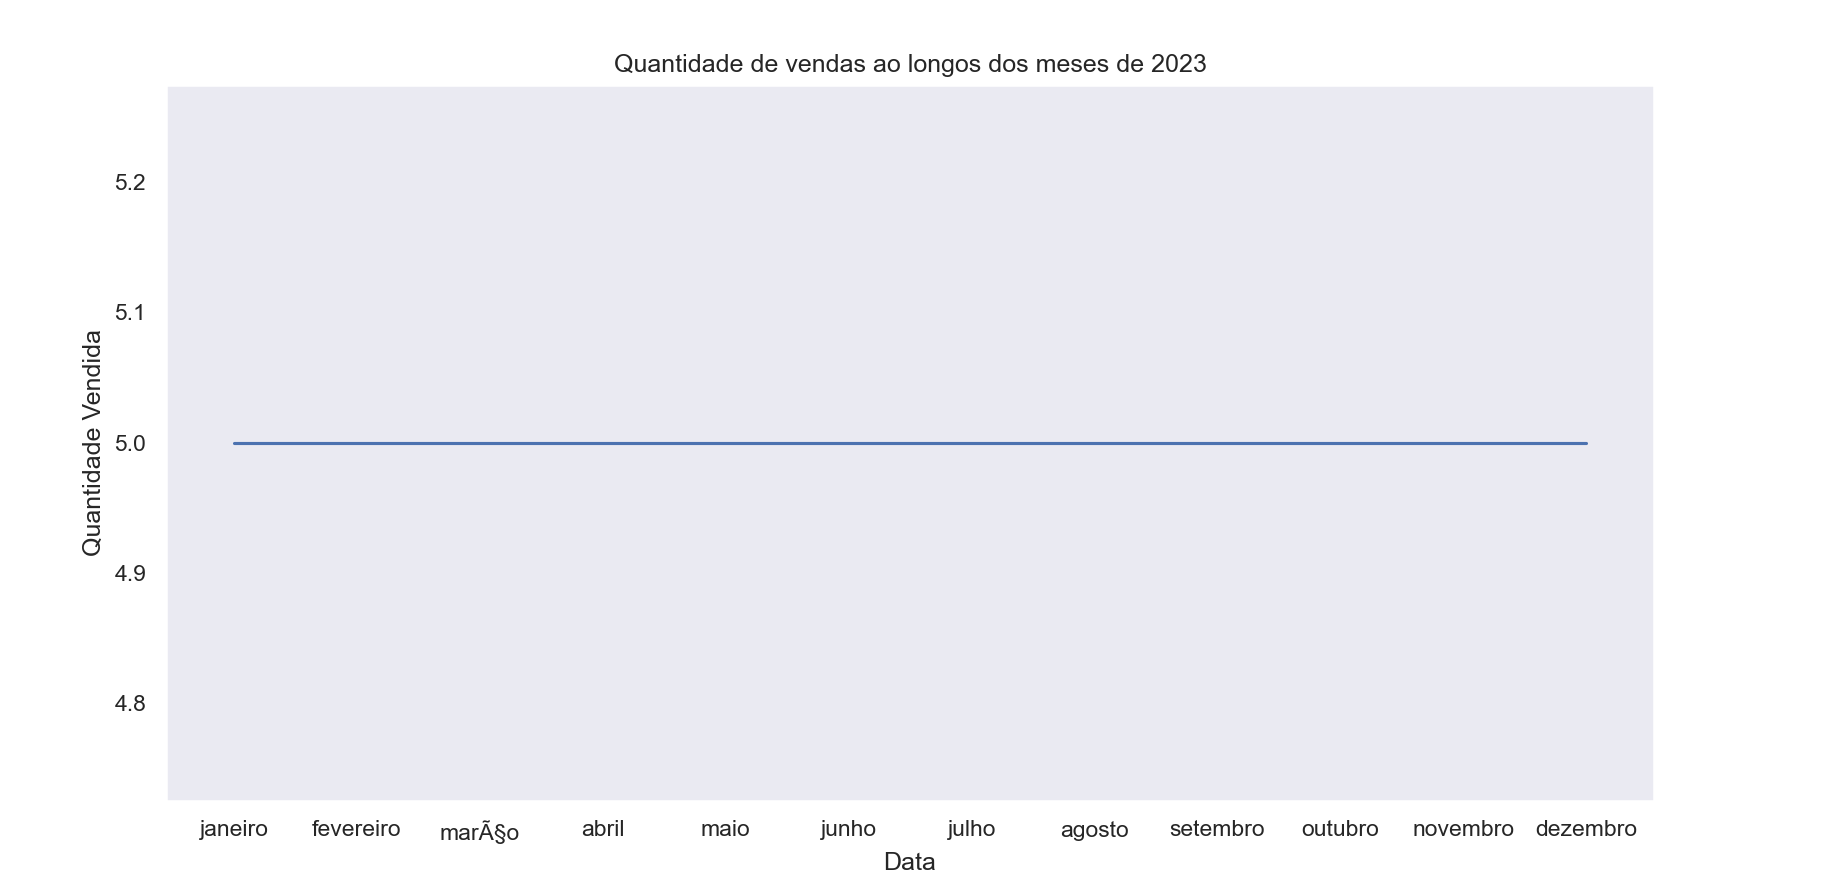

In [24]:
# Análise das vendas por mês
display(Image(filename='vendas_por_mes.png'))

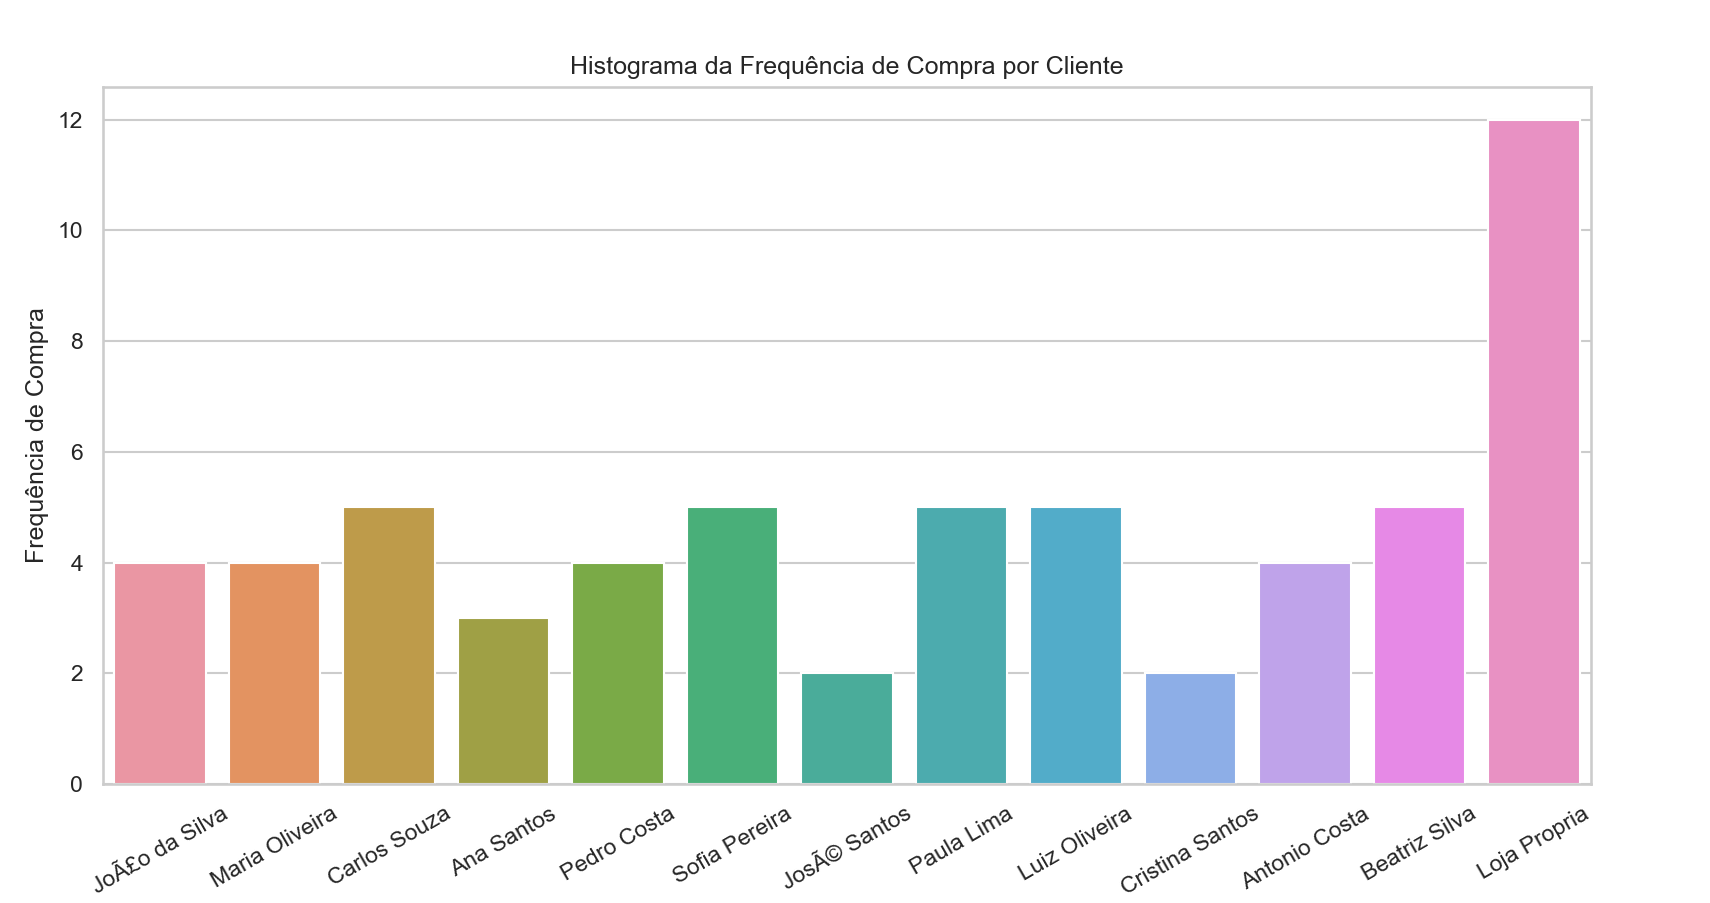

In [25]:
# Análise da frequência de compras de cada cliente
display(Image(filename='graphic_frequency.png'))

In [26]:
x = df_cliente['nome']
y = df_cliente['valor_gasto_total']

plt.scatter(x,y)
plt.xticks(rotation=45)
plt.show()

In [5]:
df_vendas.head()

,id,data,produto,quantidade,preco_unitario,cliente_id
0,1,2023-01-05,Banheira,2,2500.0,101
1,2,2023-02-12,OfurÃ´,1,3000.0,113
2,3,2023-03-20,Spa,3,5000.0,103
3,4,2023-04-10,Banheira,1,2500.0,104
4,5,2023-05-15,OfurÃ´,2,3000.0,105
